# Anomaly Detection (Continuous Probabilistic Methods)

## Exercises

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from env import check_columns

In [36]:
data = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

### 1. 

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [58]:
def get_lower_and_upper_bounds(df, k=1.5, n=5):
    """
    This function takes a pandas dataframe and a multiplier as input and returns
    the lower and upper bounds for each column in the dataframe using the IQR range rule.
    It also generates a box plot for each column in the dataframe using matplotlib.

    Args:
    - df: pandas dataframe
    - k: float, default 1.5
    - n: int, default 5

    Returns:
    - None
    """
    # Loop through each column in the dataframe
    for col in df.columns:
        try:
            # Generate a box plot for the column using matplotlib
            plt.figure(figsize=(12, 1))
            plt.boxplot(df[col], vert=False)
            plt.title(col)
            plt.show()

            # Calculate the lower and upper bounds for the column using the IQR range rule
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - k * iqr
            upper_bound = q3 + k * iqr

            # Print the number and percentage of results in each quartile
            print(
                f"Number of results in lower quartile: {len(df[df[col] < lower_bound])} ({(len(df[df[col] < lower_bound])/len(df))*100:.2f}%)"
            )
            print(
                f"Number of results in inner quartile: {len(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)])} ({(len(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)])/len(df))*100:.2f}%)"
            )
            print(
                f"Number of results in upper quartile: {len(df[df[col] > upper_bound])} ({(len(df[df[col] > upper_bound])/len(df))*100:.2f}%)"
            )
            
            # Determine the display limit based on number of results and the value of n
            lower_results = df[df[col] < lower_bound]
            upper_results = df[df[col] > upper_bound]
            lower_n = min(n, len(lower_results))
            upper_n = min(n, len(upper_results))

            # If there are results in the lower quartile, print a .head for that column
            if len(lower_results) > 0:
                print(f"\nData in lower {col} quartile (Limit {lower_n})")
                display(lower_results.head(lower_n))
            # If there are results in the upper quartile, print a .tail for that column
            if len(upper_results) > 0:
                print(f"\nData in upper {col} quartile (Limit {upper_n})")
                display(upper_results.tail(upper_n))
        except:
            # If there is an error generating the box plot, skip to the next column
            print(
                f"Error: Could not generate box plot for column {col}. Skipping to next column..."
            )
            plt.close()            
            continue


## 1. Lemonade

#### Initialize / Clean Data

In [38]:
check_columns(data)

Total rows: 365
Total columns: 7


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,365,0,0.0,"RangeIndex(start=0, stop=365, step=1)",None
1,Date,object,365,0,0.0,"[1/1/17, 1/2/17, 1/3/17, 1/4/17, 1/5/17, 1/6/1...",None
2,Day,object,7,0,0.0,"[Sunday, Monday, Tuesday, Wednesday, Thursday,...",None
3,Temperature,float64,176,0,0.0,"[27.0, 28.9, 34.5, 44.1, 42.4, 25.3, 32.9, 37....","(15.1, 212.0, 61.22)"
4,Rainfall,float64,35,0,0.0,"[2.0, 1.33, 1.05, 1.0, 1.54, 1.18, 1.11, 1.67,...","(0.4, 2.5, 0.83)"
5,Flyers,int64,63,0,0.0,"[15, 27, 28, 33, 23, 19, 20, 16, 24, 26, 30, 2...","(-38, 80, 40.1)"
6,Price,float64,1,0,0.0,[0.5],"(0.5, 0.5, 0.5)"
7,Sales,int64,39,0,0.0,"[10, 13, 15, 17, 18, 11, 12, 14, 16, 20, 21, 2...","(7, 534, 27.87)"


In [39]:
# Make all column names lowercase
data.columns = [col.lower() for col in data]

In [40]:
# Make date a datetime
data.date = pd.to_datetime(data.date, format='%m/%d/%y')

In [33]:
check_columns(data)

Total rows: 365
Total columns: 7


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,365,0,0.0,"RangeIndex(start=0, stop=365, step=1)",None
1,date,datetime64[ns],365,0,0.0,"[2017-01-01 00:00:00, 2017-01-02 00:00:00, 201...","(2017-01-01, 2017-12-31)"
2,day,object,7,0,0.0,"[Sunday, Monday, Tuesday, Wednesday, Thursday,...",None
3,temperature,float64,176,0,0.0,"[27.0, 28.9, 34.5, 44.1, 42.4, 25.3, 32.9, 37....","(15.1, 212.0, 61.22)"
4,rainfall,float64,35,0,0.0,"[2.0, 1.33, 1.05, 1.0, 1.54, 1.18, 1.11, 1.67,...","(0.4, 2.5, 0.83)"
5,flyers,int64,63,0,0.0,"[15, 27, 28, 33, 23, 19, 20, 16, 24, 26, 30, 2...","(-38, 80, 40.1)"
6,price,float64,1,0,0.0,[0.5],"(0.5, 0.5, 0.5)"
7,sales,int64,39,0,0.0,"[10, 13, 15, 17, 18, 11, 12, 14, 16, 20, 21, 2...","(7, 534, 27.87)"


#### 1a. 
Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. 

Error: Could not generate box plot for column date. Skipping to next column...
Error: Could not generate box plot for column day. Skipping to next column...


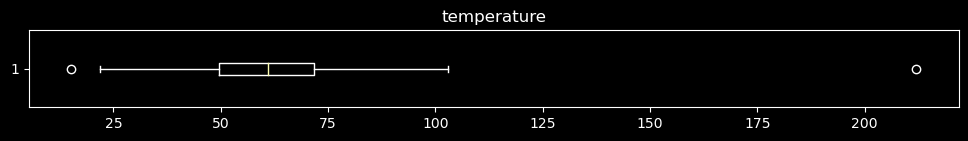

Number of results in lower quartile: 1 (0.27%)
Number of results in inner quartile: 363 (99.45%)
Number of results in upper quartile: 1 (0.27%)

Data in lower temperature quartile (Limit 1)


,date,day,temperature,rainfall,flyers,price,sales
364,2017-12-31,Sunday,15.1,2.5,9,0.5,7



Data in upper temperature quartile (Limit 1)


,date,day,temperature,rainfall,flyers,price,sales
41,2017-02-11,Saturday,212.0,0.91,35,0.5,21


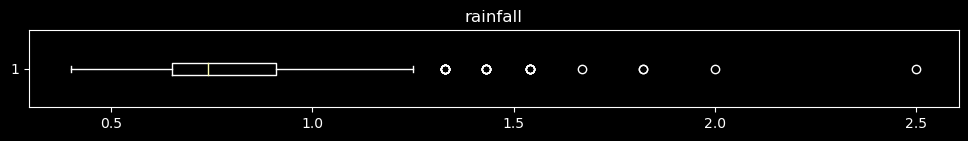

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 337 (92.33%)
Number of results in upper quartile: 28 (7.67%)

Data in upper rainfall quartile (Limit 28)


,date,day,temperature,rainfall,flyers,price,sales
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10
1,2017-01-02,Monday,28.9,1.33,15,0.5,13
2,2017-01-03,Tuesday,34.5,1.33,27,0.5,15
5,2017-01-06,Friday,25.3,1.54,23,0.5,11
6,2017-01-07,Saturday,32.9,1.54,19,0.5,13
10,2017-01-11,Wednesday,32.6,1.54,23,0.5,12
11,2017-01-12,Thursday,38.2,1.33,16,0.5,14
12,2017-01-13,Friday,37.5,1.33,19,0.5,15
15,2017-01-16,Monday,30.6,1.67,24,0.5,12
16,2017-01-17,Tuesday,32.2,1.43,26,0.5,14


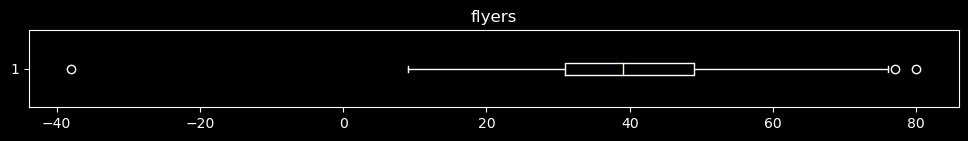

Number of results in lower quartile: 1 (0.27%)
Number of results in inner quartile: 362 (99.18%)
Number of results in upper quartile: 2 (0.55%)

Data in lower flyers quartile (Limit 1)


,date,day,temperature,rainfall,flyers,price,sales
324,2017-11-21,Tuesday,47.0,0.95,-38,0.5,20



Data in upper flyers quartile (Limit 2)


,date,day,temperature,rainfall,flyers,price,sales
166,2017-06-16,Friday,99.3,0.47,77,0.5,41
194,2017-07-14,Friday,92.0,0.50,80,0.5,40


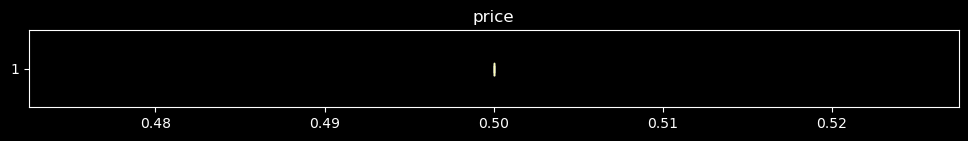

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 365 (100.00%)
Number of results in upper quartile: 0 (0.00%)


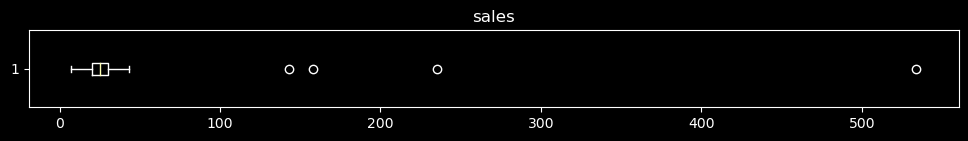

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 361 (98.90%)
Number of results in upper quartile: 4 (1.10%)

Data in upper sales quartile (Limit 4)


,date,day,temperature,rainfall,flyers,price,sales
181,2017-07-01,Saturday,102.9,0.47,59,0.5,143
182,2017-07-02,Sunday,93.4,0.51,68,0.5,158
183,2017-07-03,Monday,81.5,0.54,68,0.5,235
184,2017-07-04,Tuesday,84.2,0.59,49,0.5,534


In [62]:
get_lower_and_upper_bounds(data, n=28)


Do these lower outliers make sense? Which outliers should be kept?


In [ ]:
# Lower quartile temperature makes sense

# Lower quartile flyers do not make sense, unless they are tracking lost flyers.

#### 1b. 
Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5.


Error: Could not generate box plot for column date. Skipping to next column...
Error: Could not generate box plot for column day. Skipping to next column...


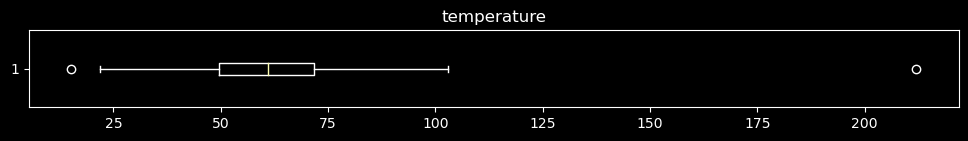

Number of results in lower quartile: 1 (0.27%)
Number of results in inner quartile: 363 (99.45%)
Number of results in upper quartile: 1 (0.27%)

Data in lower temperature quartile (Limit 1)


,date,day,temperature,rainfall,flyers,price,sales
364,2017-12-31,Sunday,15.1,2.5,9,0.5,7



Data in upper temperature quartile (Limit 1)


,date,day,temperature,rainfall,flyers,price,sales
41,2017-02-11,Saturday,212.0,0.91,35,0.5,21


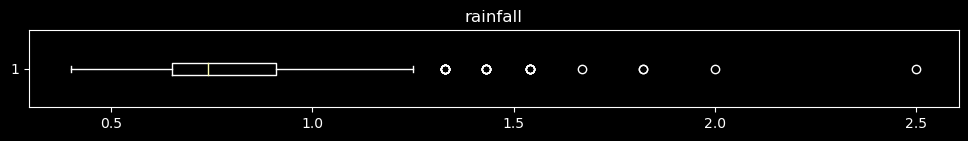

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 337 (92.33%)
Number of results in upper quartile: 28 (7.67%)

Data in upper rainfall quartile (Limit 28)


,date,day,temperature,rainfall,flyers,price,sales
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10
1,2017-01-02,Monday,28.9,1.33,15,0.5,13
2,2017-01-03,Tuesday,34.5,1.33,27,0.5,15
5,2017-01-06,Friday,25.3,1.54,23,0.5,11
6,2017-01-07,Saturday,32.9,1.54,19,0.5,13
10,2017-01-11,Wednesday,32.6,1.54,23,0.5,12
11,2017-01-12,Thursday,38.2,1.33,16,0.5,14
12,2017-01-13,Friday,37.5,1.33,19,0.5,15
15,2017-01-16,Monday,30.6,1.67,24,0.5,12
16,2017-01-17,Tuesday,32.2,1.43,26,0.5,14


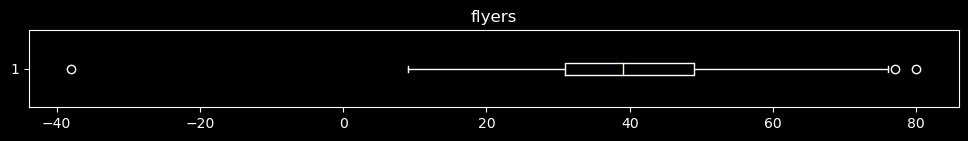

Number of results in lower quartile: 1 (0.27%)
Number of results in inner quartile: 362 (99.18%)
Number of results in upper quartile: 2 (0.55%)

Data in lower flyers quartile (Limit 1)


,date,day,temperature,rainfall,flyers,price,sales
324,2017-11-21,Tuesday,47.0,0.95,-38,0.5,20



Data in upper flyers quartile (Limit 2)


,date,day,temperature,rainfall,flyers,price,sales
166,2017-06-16,Friday,99.3,0.47,77,0.5,41
194,2017-07-14,Friday,92.0,0.50,80,0.5,40


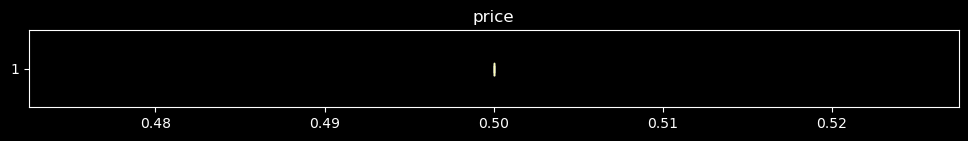

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 365 (100.00%)
Number of results in upper quartile: 0 (0.00%)


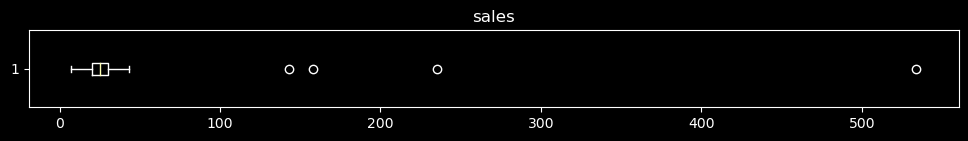

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 361 (98.90%)
Number of results in upper quartile: 4 (1.10%)

Data in upper sales quartile (Limit 4)


,date,day,temperature,rainfall,flyers,price,sales
181,2017-07-01,Saturday,102.9,0.47,59,0.5,143
182,2017-07-02,Sunday,93.4,0.51,68,0.5,158
183,2017-07-03,Monday,81.5,0.54,68,0.5,235
184,2017-07-04,Tuesday,84.2,0.59,49,0.5,534


In [60]:
get_lower_and_upper_bounds(data, n=28)

Do these upper outliers make sense? Which outliers should be kept?

In [ ]:
# Temperature: 200 degrees, I'd try to replace it with an accuracte number.

# Upper rainfall seems fine, but if it is below 32, it shouldn't be classified as rain. I would rename the column precipitation

# Upper flyers seems fine.

# Upper sales seems fine.

#### 1e. 
Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv.

Error: Could not generate box plot for column date. Skipping to next column...
Error: Could not generate box plot for column day. Skipping to next column...


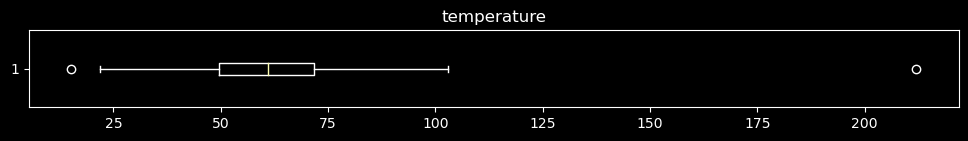

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 364 (99.73%)
Number of results in upper quartile: 1 (0.27%)

Data in upper temperature quartile (Limit 1)


,date,day,temperature,rainfall,flyers,price,sales
41,2017-02-11,Saturday,212.0,0.91,35,0.5,21


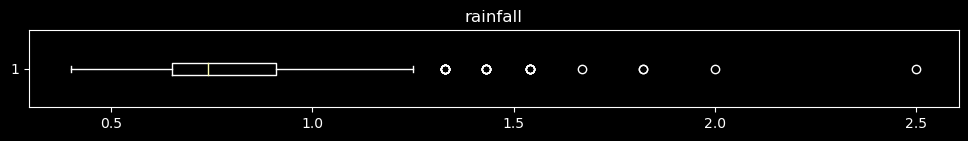

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 361 (98.90%)
Number of results in upper quartile: 4 (1.10%)

Data in upper rainfall quartile (Limit 4)


,date,day,temperature,rainfall,flyers,price,sales
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10
338,2017-12-05,Tuesday,22.0,1.82,11,0.5,10
343,2017-12-10,Sunday,31.3,1.82,15,0.5,11
364,2017-12-31,Sunday,15.1,2.50,9,0.5,7


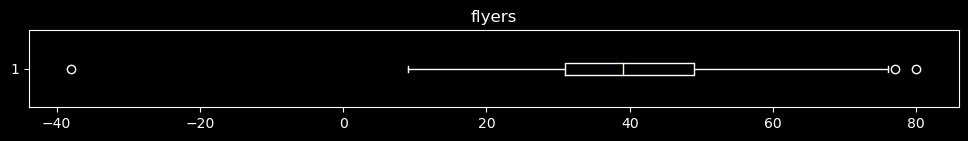

Number of results in lower quartile: 1 (0.27%)
Number of results in inner quartile: 364 (99.73%)
Number of results in upper quartile: 0 (0.00%)

Data in lower flyers quartile (Limit 1)


,date,day,temperature,rainfall,flyers,price,sales
324,2017-11-21,Tuesday,47.0,0.95,-38,0.5,20


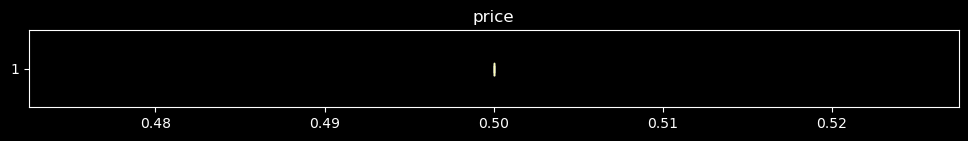

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 365 (100.00%)
Number of results in upper quartile: 0 (0.00%)


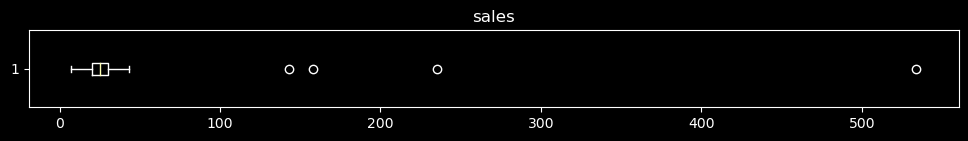

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 361 (98.90%)
Number of results in upper quartile: 4 (1.10%)

Data in upper sales quartile (Limit 4)


,date,day,temperature,rainfall,flyers,price,sales
181,2017-07-01,Saturday,102.9,0.47,59,0.5,143
182,2017-07-02,Sunday,93.4,0.51,68,0.5,158
183,2017-07-03,Monday,81.5,0.54,68,0.5,235
184,2017-07-04,Tuesday,84.2,0.59,49,0.5,534


In [63]:
get_lower_and_upper_bounds(data, k=3)

In [ ]:
# Once again, I'd fix the upper temp the same way.

# Upper rainfall should be precip

# Upper flyers seems fine

# Upper sales seems fine

#### 1f. 
Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?


In [ ]:
# Lower flyer is negative. Unless they're tracking lost flyers, it'll need to be corrected.


### 2. 
Identify if any columns in lemonade.csv are normally distributed.


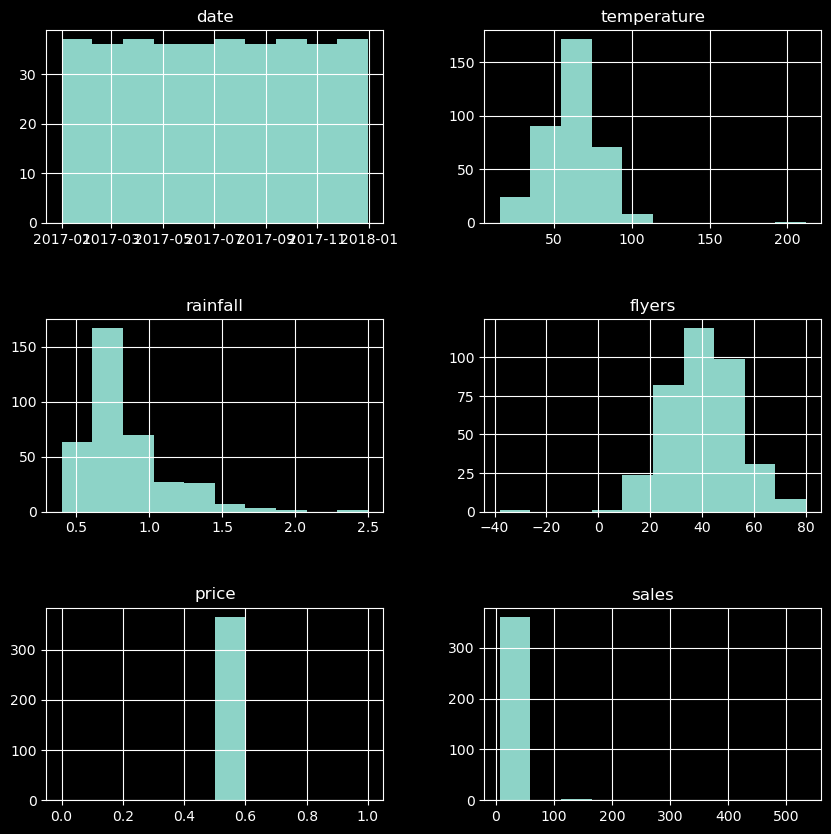

In [64]:
# Plot all the columns as a histogram
data.hist(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)
plt.show()


#### 2a. 
For normally distributed columns use a 2 sigma decision rule to isolate the outliers.


In [65]:
# Use a 2 sigma decision rule outlier isolation
data[
    (data.flyers < data.flyers.mean() - 2 * data.flyers.std())
    | (data.flyers > data.flyers.mean() + 2 * data.flyers.std())
]

,date,day,temperature,rainfall,flyers,price,sales
166,2017-06-16,Friday,99.3,0.47,77,0.5,41
170,2017-06-20,Tuesday,85.1,0.54,70,0.5,37
171,2017-06-21,Wednesday,94.3,0.47,76,0.5,41
182,2017-07-02,Sunday,93.4,0.51,68,0.5,158
183,2017-07-03,Monday,81.5,0.54,68,0.5,235
194,2017-07-14,Friday,92.0,0.50,80,0.5,40
198,2017-07-18,Tuesday,99.3,0.47,76,0.5,41
203,2017-07-23,Sunday,89.1,0.51,72,0.5,37
204,2017-07-24,Monday,83.5,0.57,69,0.5,35
207,2017-07-27,Thursday,97.9,0.47,74,0.5,43



#### 2b. 
Do these make sense?


In [ ]:
# Negative Flyers and a temperature of 212 do not make sense.


#### 2c. 
Should certain outliers be kept or removed?


In [ ]:
# Negative Flyers and a temperature of 212 should be corrected, and if not possible, removed.


### 3. 

Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [66]:
# 3 sigma decision rule outlier isolation
data[
    (data.flyers < data.flyers.mean() - 3 * data.flyers.std())
    | (data.flyers > data.flyers.mean() + 3 * data.flyers.std())
]

,date,day,temperature,rainfall,flyers,price,sales
324,2017-11-21,Tuesday,47.0,0.95,-38,0.5,20
